https://ok97465.github.io/2019/10/191019_PrincipleOfCT

# CT란?

- Computed Tomography (CT) 촬영의 원리
1. Computed Tomography란?  
CT 장비는 아래 그림과 같이 내부 상태를 알고자 하는 부위를 회전축으로 하여 장비를 회전시키며 다양한 각도에서 X-Ray를 찍는다. 획득된 여러 X-Ray 정보를 합성하여 내부의 상태를 알아내는 것이 CT 촬영이다.

X-Ray를 회전하면서 촬영하면 왜 내부의 정보를 정확하게 알 수 있는 것일까?

X-Ray 촬영은 Figure 1과 같이 X-Ray가 투과하면서 감쇄되는 값을 측정하는 것이다. (네모 안의 값이 감쇄 값)
하나의 방향에서만 X-Ray 촬영을 하면 투과한 모든 물질의 감쇄 값 합을 알 수 있을 뿐 물질의 위치나 물질 각각의 감쇄 값을 알지 못한다.
즉 Figure 1의 (a)와 (b)는 X-Ray 촬영 결과에선 동일하게 보인다.

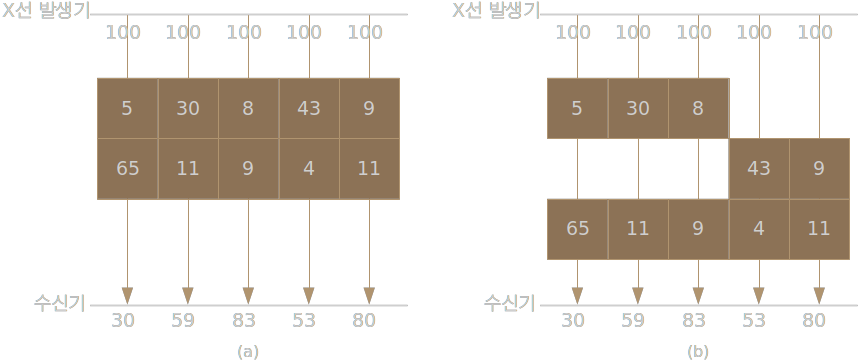![]()

하지만 X-Ray 장비를 회전 시켜서 물체를 다른 각도로 촬영하면 Figure 1과는 다르게 (a)와 (b)의 촬영 결과는 달라지게 된다.

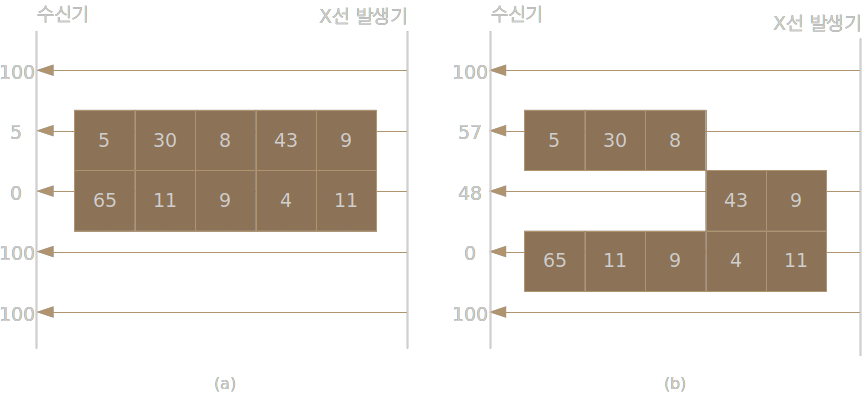

즉 CT는 X-Ray 촬영을 여러 각도에서 수행하여 다양한 정보를 수집하고 그 정보를 조합하여 물체 내부의 영상을 추출하는 방식이다. 정보를 조합하는 방법은 아래에서 수학적으로 설명한다.






<h3 id="21-radon-transform">2.1. Radon transform</h3>
CT의 원리를 수학적으로 풀어보기 위해서는 먼저 물체를 투과한 X-Ray 신호를 수학적으로 정의하여야 한다.   

위의 그림들로 유추해 보면 X-Ray 촬영은 간단한 선적분인 것을 알 수 있다.   

하지만 CT의 경우 X선 발생기의 회전도 변수로 추가되어야 하므로 선적분 함수에 회전 변수가 추가되어야 한다.   

이런 함수를 Radom transform이라고 부른다.

먼저 Figure 3과 같이 축을 정의한다.

\begin{matrix} x=u\cos  \theta -v\sin  \theta  \\y=u \sin\theta + v \cos\theta  \end{matrix}

$p\left(u,v\right)=\int _{ -L }^{ L }{ g\left( x\left( u,v \right) , y\left( u,v \right)  \right) dv}$  


$p\left( u,\theta  \right) =\int _{ -L }^{ L }{ g\left( u\cos  \theta -v\sin  \theta , u \sin\theta + v \cos\theta  \right) dv }$



<h3 id="22-fourier-slice-theorem-2">2.2. Fourier slice theorem </h3>
<p>Radon transform으로 얻어진 함수 $p\left(u, \theta\right)$를 $u$에 대해서 Fourier transform 한 결과
 $P(U,\theta)$는 g(x, y)의 2D Fourier transform을 Polar Grid, 극좌표에서 본 것과 같다.</p>

</p>먼저 random transform결과에 Fourier transform을 적용하면 다음과 같다.</p>

$P\left( U,\theta  \right) =\int { p\left( u,\theta  \right) { e }^{ -jUu }du }$


<p>$g\left(x, y\right)$를 Fourier transform을 Polar Grid $\left(U, \theta\right)$로 출력하면 다음과 같다.</p>

$G\left( U\cos  \theta ,U\sin  \theta  \right) =\iint { g\left( x,y \right)  } { e }^{ -jU\cos \theta x}{ e }^{ -jU\sin \theta y}dxdy\$

</br>

<p>$x, y$를 $u, v$로 치환하면 아래와 같이 random transform이후 u축에 대한 Fourier transform으로 정리된다.</p>

$G\left( U\cos  \theta ,U\sin  \theta  \right) =\iint { g\left( u\cos  \theta -v\sin  \theta ,u\sin  \theta +v\cos  \theta  \right)  } e^{ -jUu }dudv$   

$=\int { \left( \int { g\left( u\cos  \theta -v\sin  \theta ,u\sin  \theta +v\cos  \theta  \right) dv }  \right) { e }^{ -Uu }du }$

$=\int { \left( \int { p\left( u,\theta  \right)  }  \right) { e }^{ -Uu }du }$

$=P\left(U, \theta \right)$

<h3 id="23-convolution-backprojection">2.3. Convolution backprojection</h3>
<p>2D Fourier transform data가 있다면 2D inverse transform을 이용하면 쉽게 데이터를 복원 할 수 있다.
  
  CT 수신 신호를 $u$축에 대해서 Fourier transform하면 $g$함수의 2D Fourier transform data를 얻을 수 있지만 Polar grid에서 얻어지게 되므로 영상으로 복원하기 위해서는 약간의 연산이 더 필요해진다.</p>

<p>2D Fourier transform 데이터가 직각 좌표계$\left(U,V\right)$였다면 다음과 같이 간단한 Inverse fourier transform으로 $g$를 구할 수 있을 것이다.</p>  

$g\left( u\cos  \phi ,u\sin  \phi  \right) =\iint { G\left( U,V \right)  } { e }^{ ju\cos  \phi U }{ e }^{ ju\sin  \phi V }dUdV$

</br>

<p>하지만 얻을 수 있는 데이터가 Polar grid이므로 적분 수식을 다음과 같이 변경하여야 한다.</p>

$g\left( u\cos  \phi ,u\sin  \phi  \right) =\int _{ -\pi /2 }^{ \pi /2 }{ \left( \int _{ -\infty  }^{ \infty  }{ G\left( U\cos  \theta ,U\sin  \theta  \right)  } {\left| U \right| e }^{ ju\cos  \phi U\cos  \theta  }{ e }^{ ju\sin  U\sin  \theta  }dU \right) d\theta  }$

$=\int _{ -\pi /2 }^{ \pi /2 }{ \left( \int _{ -\infty  }^{ \infty  }{ G\left( U\cos  \theta ,U\sin  \theta  \right)  } { \left| U \right| e }^{ juU\cos  \left( \phi -\theta  \right)  }dU \right) d\theta  }$

</br>

<p>Polar grid 적분을 위해서 Jacobian matrix에 의해서 추가된 $\left|U\right|$는 주파수 영역에서 Filtering, 영상 영역에서는 Convolution으로 해석 될 수 있다.    

그래서 위와 같은 변환을 filtered backprojection 혹은 Convolution backprojection이라고 부른다.<br />
<br /></p>

<p>정리하면 신체를 투과한 X-ray 자료를 각도 별로 수집하고 그 data를 Fourier transform 한다.

Fourier transform된 data에 Convolution backprojection을 적용하면 신체 내부의 정보를 얻을 수 있게된다.</p>


<h3 id="31-원본-이미지">3.1. 원본 이미지</h3>


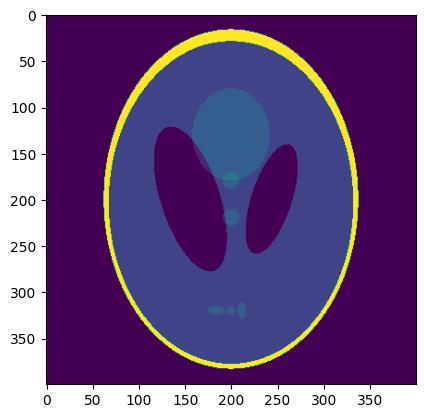

In [ ]:
plt.imshow(image_original)

In [1]:
pip install scikit-image

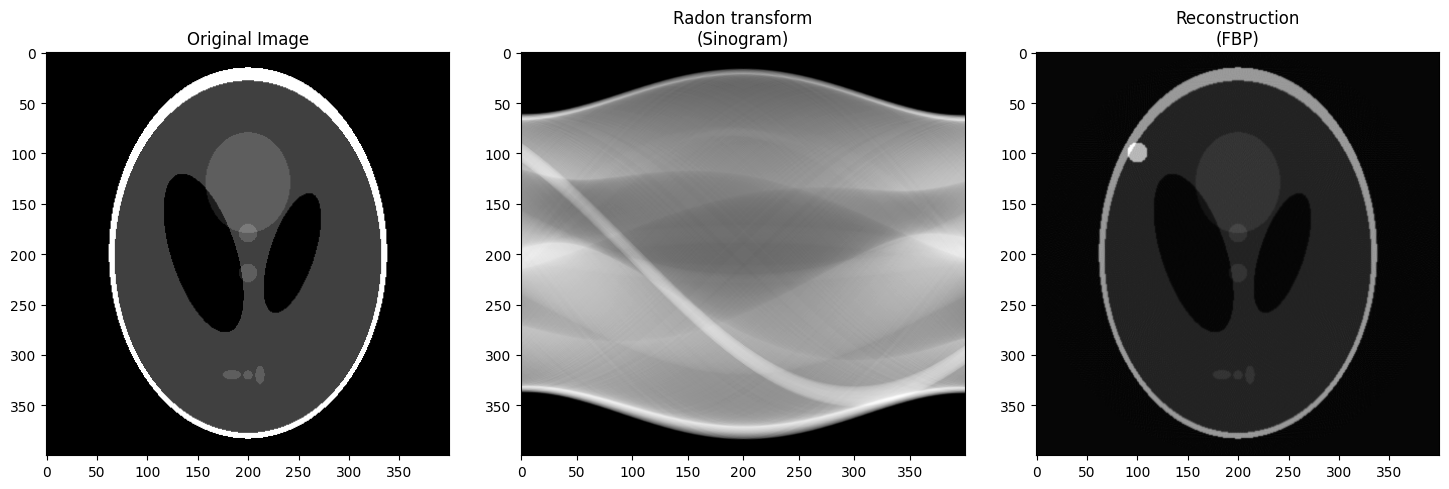

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import radon, iradon
from skimage.data import shepp_logan_phantom
from skimage.draw import disk
from scipy.ndimage import rotate

# 이미지 생성: Shepp-Logan 팬텀
image = shepp_logan_phantom()
image_original = np.copy(image) # 원본 이미지 복사

# 이미지에 원형의 객체 추가
rr, cc = disk((100, 100), 10)
image[rr, cc] += 1

# Radon 변환 수행
theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta)

# 역 Radon 변환으로 이미지 재구성
reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp')

# 결과 시각화
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image_original, cmap=plt.cm.Greys_r)
axes[0].set_title('Original Image')
axes[1].imshow(sinogram, cmap=plt.cm.Greys_r, aspect='auto')
axes[1].set_title('Radon transform\n(Sinogram)')
axes[2].imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
axes[2].set_title('Reconstruction\n(FBP)')

plt.tight_layout()
plt.show()
